<a href="https://colab.research.google.com/github/Rafael-limaa/Deep-Learning/blob/main/deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Carregamento da base
df = pd.read_csv('WineQT.csv')
df.dropna(inplace=True)
df.drop(columns=['Id'], inplace=True)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Separação entre features (X) e variável alvo (y)
X = df.drop(columns=['quality'])
y = df['quality']

In [ ]:
# Normalizando os dados — assim tudo fica na mesma escala
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convertendo a qualidade para um formato que o computador entende melhor (one-hot)
y_cat = to_categorical(y)

In [ ]:
# Dividindo os dados em 2 partes: treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.3, random_state=42)


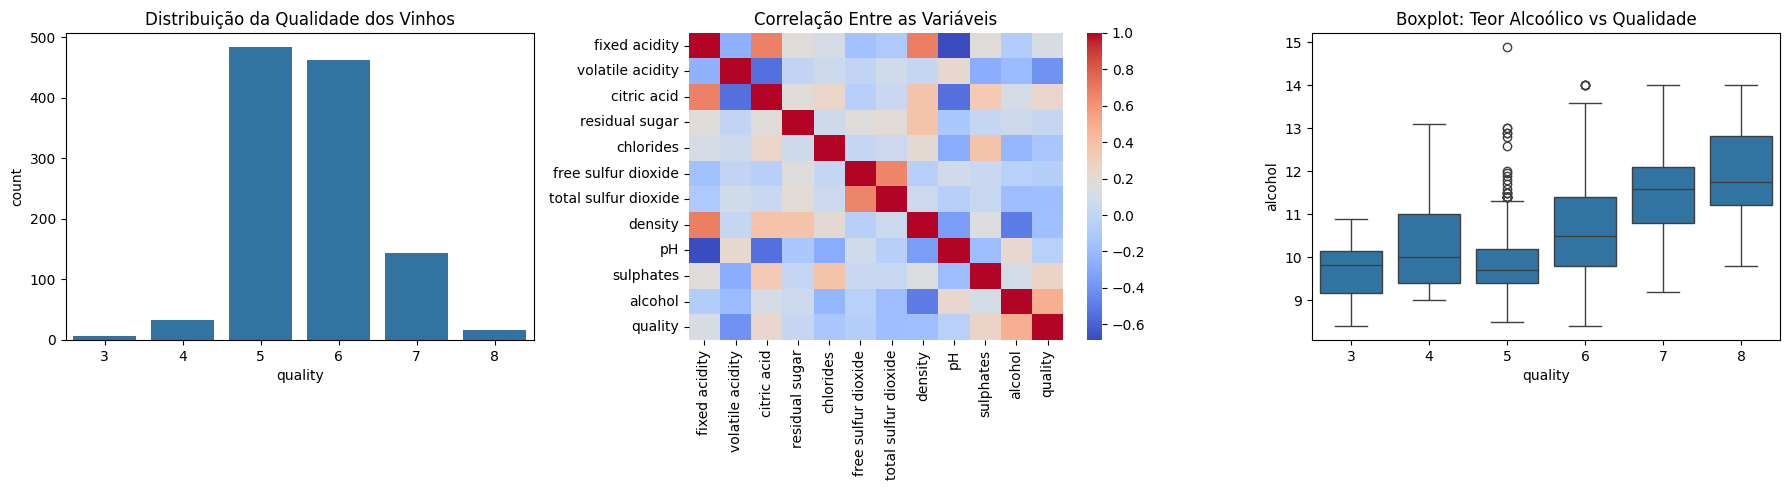

In [ ]:
# EXPLORAÇÃO DOS DADOS
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='quality', data=df)
plt.title('Distribuição da Qualidade dos Vinhos')

plt.subplot(1, 3, 2)
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlação Entre as Variáveis')

plt.subplot(1, 3, 3)
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Boxplot: Teor Alcoólico vs Qualidade')

plt.tight_layout()
plt.show()

In [ ]:
# -----------------------------------------
# MODELO 1: Uma camada escondida
model1 = Sequential()
model1.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
model1.add(Dense(y_cat.shape[1], activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# MODELO 2: Duas camadas escondidas
model2 = Sequential()
model2.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(y_cat.shape[1], activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_split=0.2)


In [ ]:
# MODELO 3: Usando BATCH SIZE maior (64)
model3 = Sequential()
model3.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(y_cat.shape[1], activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0, validation_split=0.2)


In [ ]:
# MODELO 4: Usando EARLY STOPPING (para quando não melhora mais)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model4 = Sequential()
model4.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model4.add(Dense(16, activation='relu'))
model4.add(Dense(y_cat.shape[1], activation='softmax'))
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history4 = model4.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    verbose=0,
    validation_split=0.2,
    callbacks=[early_stop]
)


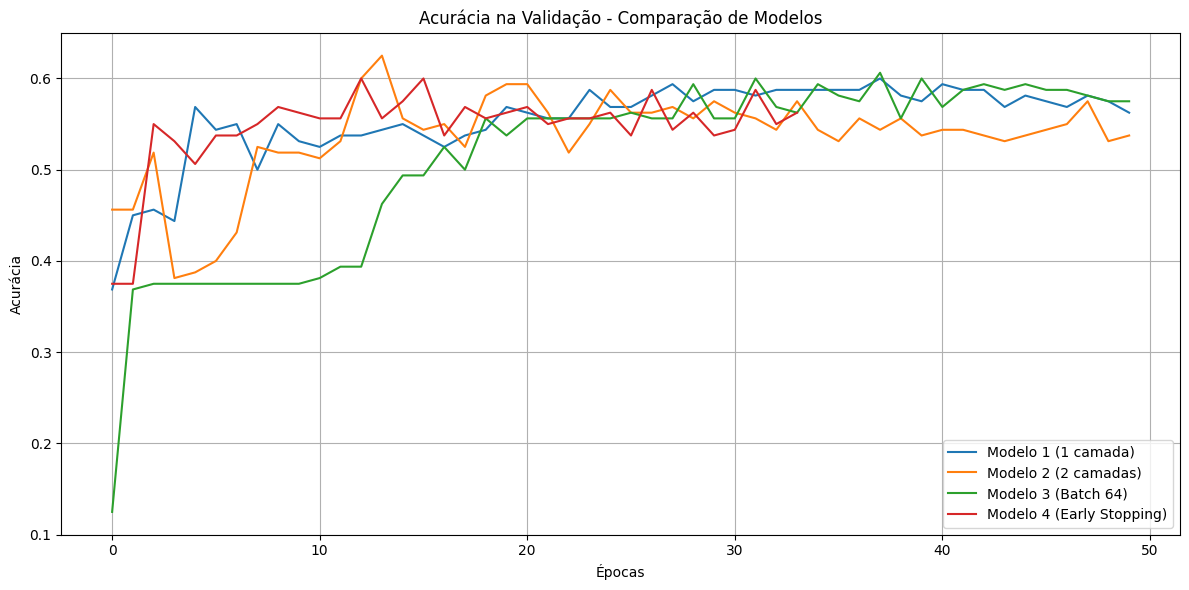

In [ ]:
# ---------------------------------------------------
# COMPARAÇÃO DOS 4 MODELOS

plt.figure(figsize=(12, 6))
plt.plot(history1.history['val_accuracy'], label='Modelo 1 (1 camada)')
plt.plot(history2.history['val_accuracy'], label='Modelo 2 (2 camadas)')
plt.plot(history3.history['val_accuracy'], label='Modelo 3 (Batch 64)')
plt.plot(history4.history['val_accuracy'], label='Modelo 4 (Early Stopping)')
plt.title('Acurácia na Validação - Comparação de Modelos')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Função para extrair últimas métricas dos históricos
def extrair_metricas(history, nome_modelo, camadas, batch_size, early_stopping):
    return {
        'Modelo': nome_modelo,
        'Camadas Ocultas': camadas,
        'Batch Size': batch_size,
        'Early Stopping': early_stopping,
        'Val_Accuracy Final': round(history.history['val_accuracy'][-1], 4),
        'Val_Loss Final': round(history.history['val_loss'][-1], 4),
        'Épocas Treinadas': len(history.history['val_loss'])
    }

# Coleta dos dados para cada modelo
resultados = [
    extrair_metricas(history1, 'Modelo 1', 1, 16, False),
    extrair_metricas(history2, 'Modelo 2', 2, 16, False),
    extrair_metricas(history3, 'Modelo 3', 2, 64, False),
    extrair_metricas(history4, 'Modelo 4', 2, 16, True)
]

# Criando DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Exibindo a tabela
print(df_resultados)


     Modelo  Camadas Ocultas  Batch Size  Early Stopping  Val_Accuracy Final  \
0  Modelo 1                1          16           False              0.5625   
1  Modelo 2                2          16           False              0.5375   
2  Modelo 3                2          64           False              0.5750   
3  Modelo 4                2          16            True              0.5625   

   Val_Loss Final  Épocas Treinadas  
0          0.9493                50  
1          0.9453                50  
2          0.9514                50  
3          0.9174                34  
